In [1]:
import os
import pandas as pd

In [44]:
name = "dxy"

old = pd.read_csv(
    "C:/Jehyeon/SKKU_2025/TSPJ/data/raw2/US Dollar Index Historical Data (1).csv", 
    index_col=0, 
    parse_dates=True
)["Price"].sort_index()
old# = old.str.replace(",","").astype(float)

Date
1990-01-01     93.21
1990-01-02     94.29
1990-01-03     94.42
1990-01-04     92.52
1990-01-05     92.85
               ...  
1999-12-27    101.49
1999-12-28    101.94
1999-12-29    101.98
1999-12-30    101.82
1999-12-31    101.87
Name: Price, Length: 2608, dtype: float64

<Axes: >

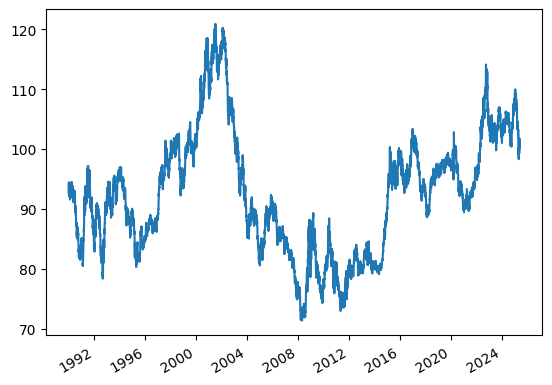

In [45]:
new = pd.read_pickle(f"data/raw/{name}.pkl")
cc = pd.concat([old, new]).sort_index()
cc.name = name
cc.plot()

In [46]:
cc.to_pickle(f"data/raw2pp/{name}.pkl")

Fred data

In [54]:
brent = pd.read_csv("data/raw2/DCOILBRENTEU.csv", index_col=0, parse_dates=True)["DCOILBRENTEU"].dropna()
brent.index.name = None
brent.name = 'brent'


In [61]:
b = pd.read_pickle("data/raw/brent.pkl")
bb = pd.concat([brent, b]).sort_index()
bb.to_pickle("data/raw2pp/brenk.pkl")

In [71]:
t10 = pd.read_csv("data/raw2/DGS10.csv", index_col=0, parse_dates=True)["DGS10"].dropna()
t10.index.name = None
t10.name = 't10'
t10

1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2025-05-28    4.47
2025-05-29    4.43
2025-05-30    4.41
2025-06-02    4.46
2025-06-03    4.46
Name: t10, Length: 15840, dtype: float64

In [70]:
def calculate_returns(yield_, face_value, years_to_maturity):
    # Calculate bond prices from yields
    bond_prices = face_value / ((1 + yield_ / 100) ** years_to_maturity)
    returns = bond_prices.pct_change(fill_method=None)
    return returns

In [79]:
rtn = calculate_returns(t10, 100, 10)
(rtn+1).cumprod().to_pickle("data/raw2pp/t10.pkl")

Concat

In [2]:
listdir = os.listdir("data/raw2pp")

lst = []
for i in listdir:
    c = pd.read_pickle(f"data/raw2pp/{i}").reset_index().drop_duplicates(subset=["index"]).set_index('index')[i[:-4]]
    c.index.name = None
    lst.append(c)

In [3]:
pd.concat(lst, axis=1).dropna().to_pickle("data/asset_cc2.pkl")